# 1.Importing Libraries



 Imports the pandas library for data manipulation and numpy for numerical operations. These are fundamental libraries for data science in Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading Data

Reads a CSV file named "diabetes_prediction_dataset.csv" into a pandas DataFrame called df. This loads the dataset for analysis.

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

# 3. Data Exploration

 These lines display the first few rows of the DataFrame (df.head()), provide information about the DataFrame's structure and data types (df.info()), and generate descriptive statistics of the numerical columns (df.describe()). These are common steps for initial data exploration.

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               19999 non-null  object 
 1   age                  19999 non-null  float64
 2   hypertension         19999 non-null  int64  
 3   heart_disease        19999 non-null  int64  
 4   smoking_history      19999 non-null  object 
 5   bmi                  19999 non-null  float64
 6   HbA1c_level          19999 non-null  float64
 7   blood_glucose_level  19999 non-null  int64  
 8   diabetes             19999 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.4+ MB


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,41.955750,0.076354,0.038752,27.358741,5.523146,137.771039,0.086354
std,22.486383,0.265570,0.193008,6.635774,1.081116,41.031142,0.280894
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.720000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.595000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


## 4. Data Cleaning and Preprocessing
### Handling missing values, outliers, and duplicate data to ensure data quality.
### Converting categorical features into numerical representation for model compatibility.

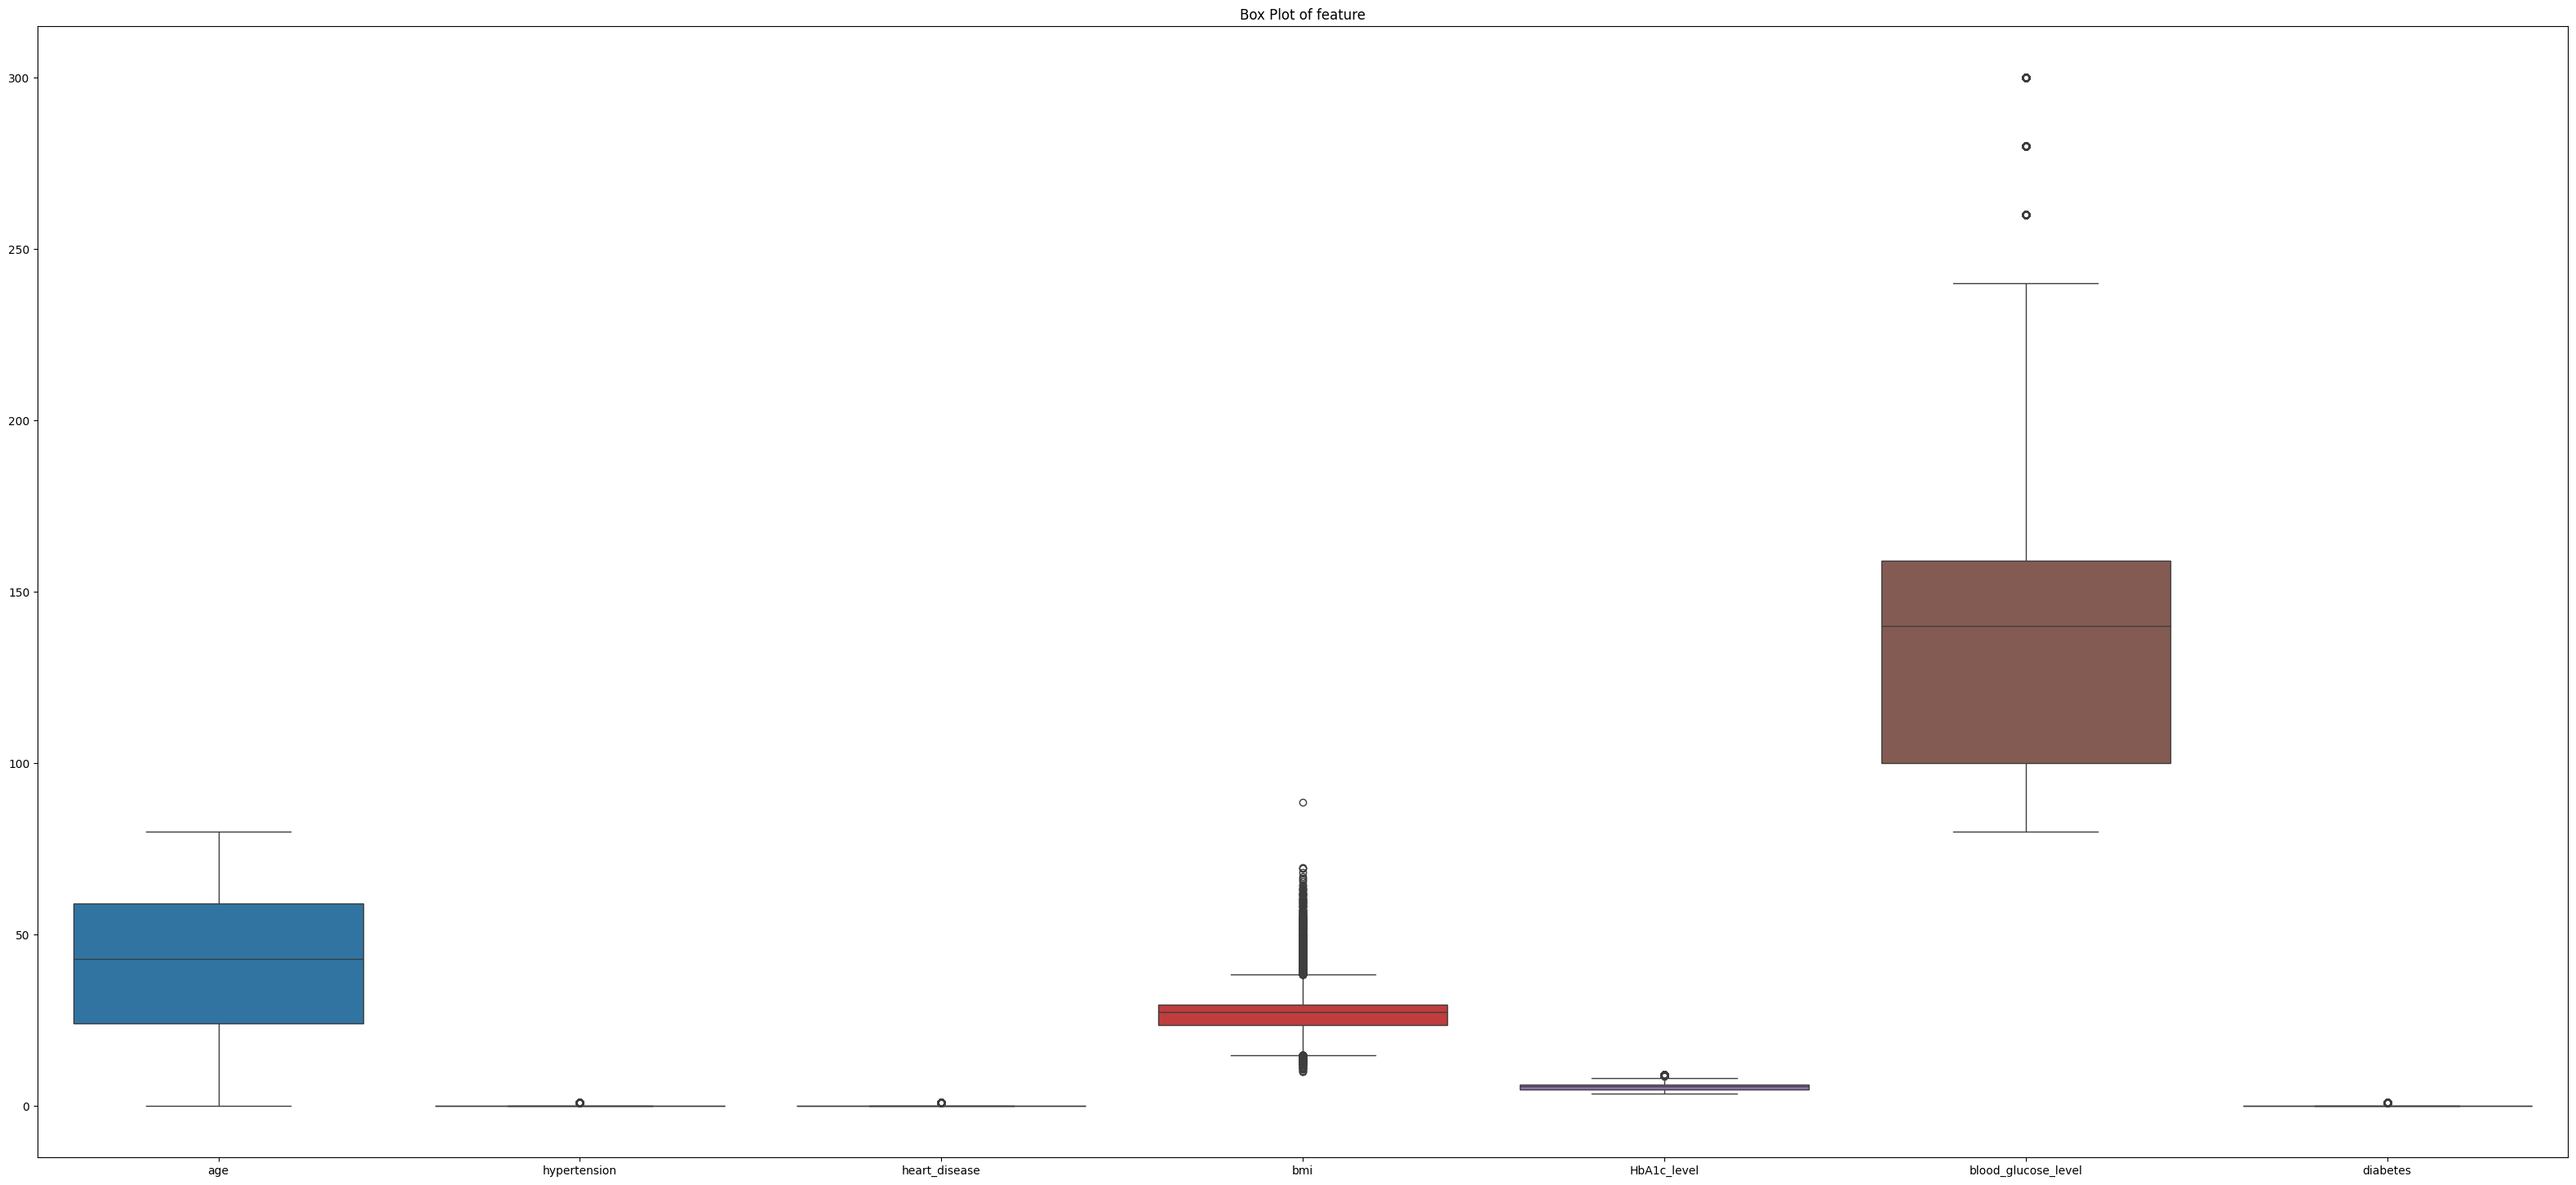

In [6]:
plt.figure(figsize=(40, 18))
sns.boxplot(df)
plt.title('Box Plot of feature')
plt.show()

In [7]:
# Checking the outlier counts
def outlier_count(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return len(outliers)

cols = ['bmi', 'HbA1c_level', 'hypertension', 'heart_disease', 'blood_glucose_level']
for col in cols:
    outlier_num = outlier_count(df, col)
    print(f"Number of outliers in {col}: {outlier_num}")

Number of outliers in bmi: 1477
Number of outliers in HbA1c_level: 283
Number of outliers in hypertension: 1527
Number of outliers in heart_disease: 775
Number of outliers in blood_glucose_level: 413


# 5. Class Distribution

In [8]:
df.diabetes.value_counts()

,count
diabetes,
0,18272
1,1727


In [9]:
df.shape

(19999, 9)

In [10]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


# 6. Data Preprocessing

Imports the LabelEncoder class from sklearn.preprocessing to convert categorical features ('smoking_history' and 'gender') into numerical representations. This is often necessary for machine learning algorithms that work with numerical data.

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
df["smoking_history"]=le.fit_transform(df["smoking_history"])

In [13]:
df["gender"]=le.fit_transform(df["gender"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               19999 non-null  int64  
 1   age                  19999 non-null  float64
 2   hypertension         19999 non-null  int64  
 3   heart_disease        19999 non-null  int64  
 4   smoking_history      19999 non-null  int64  
 5   bmi                  19999 non-null  float64
 6   HbA1c_level          19999 non-null  float64
 7   blood_glucose_level  19999 non-null  int64  
 8   diabetes             19999 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.4 MB


In [15]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


## 7. Exploratory Data Analysis (EDA)
### Visualizing data distributions and relationships between features to gain insights.
### Checking for correlations between features and the target variable.

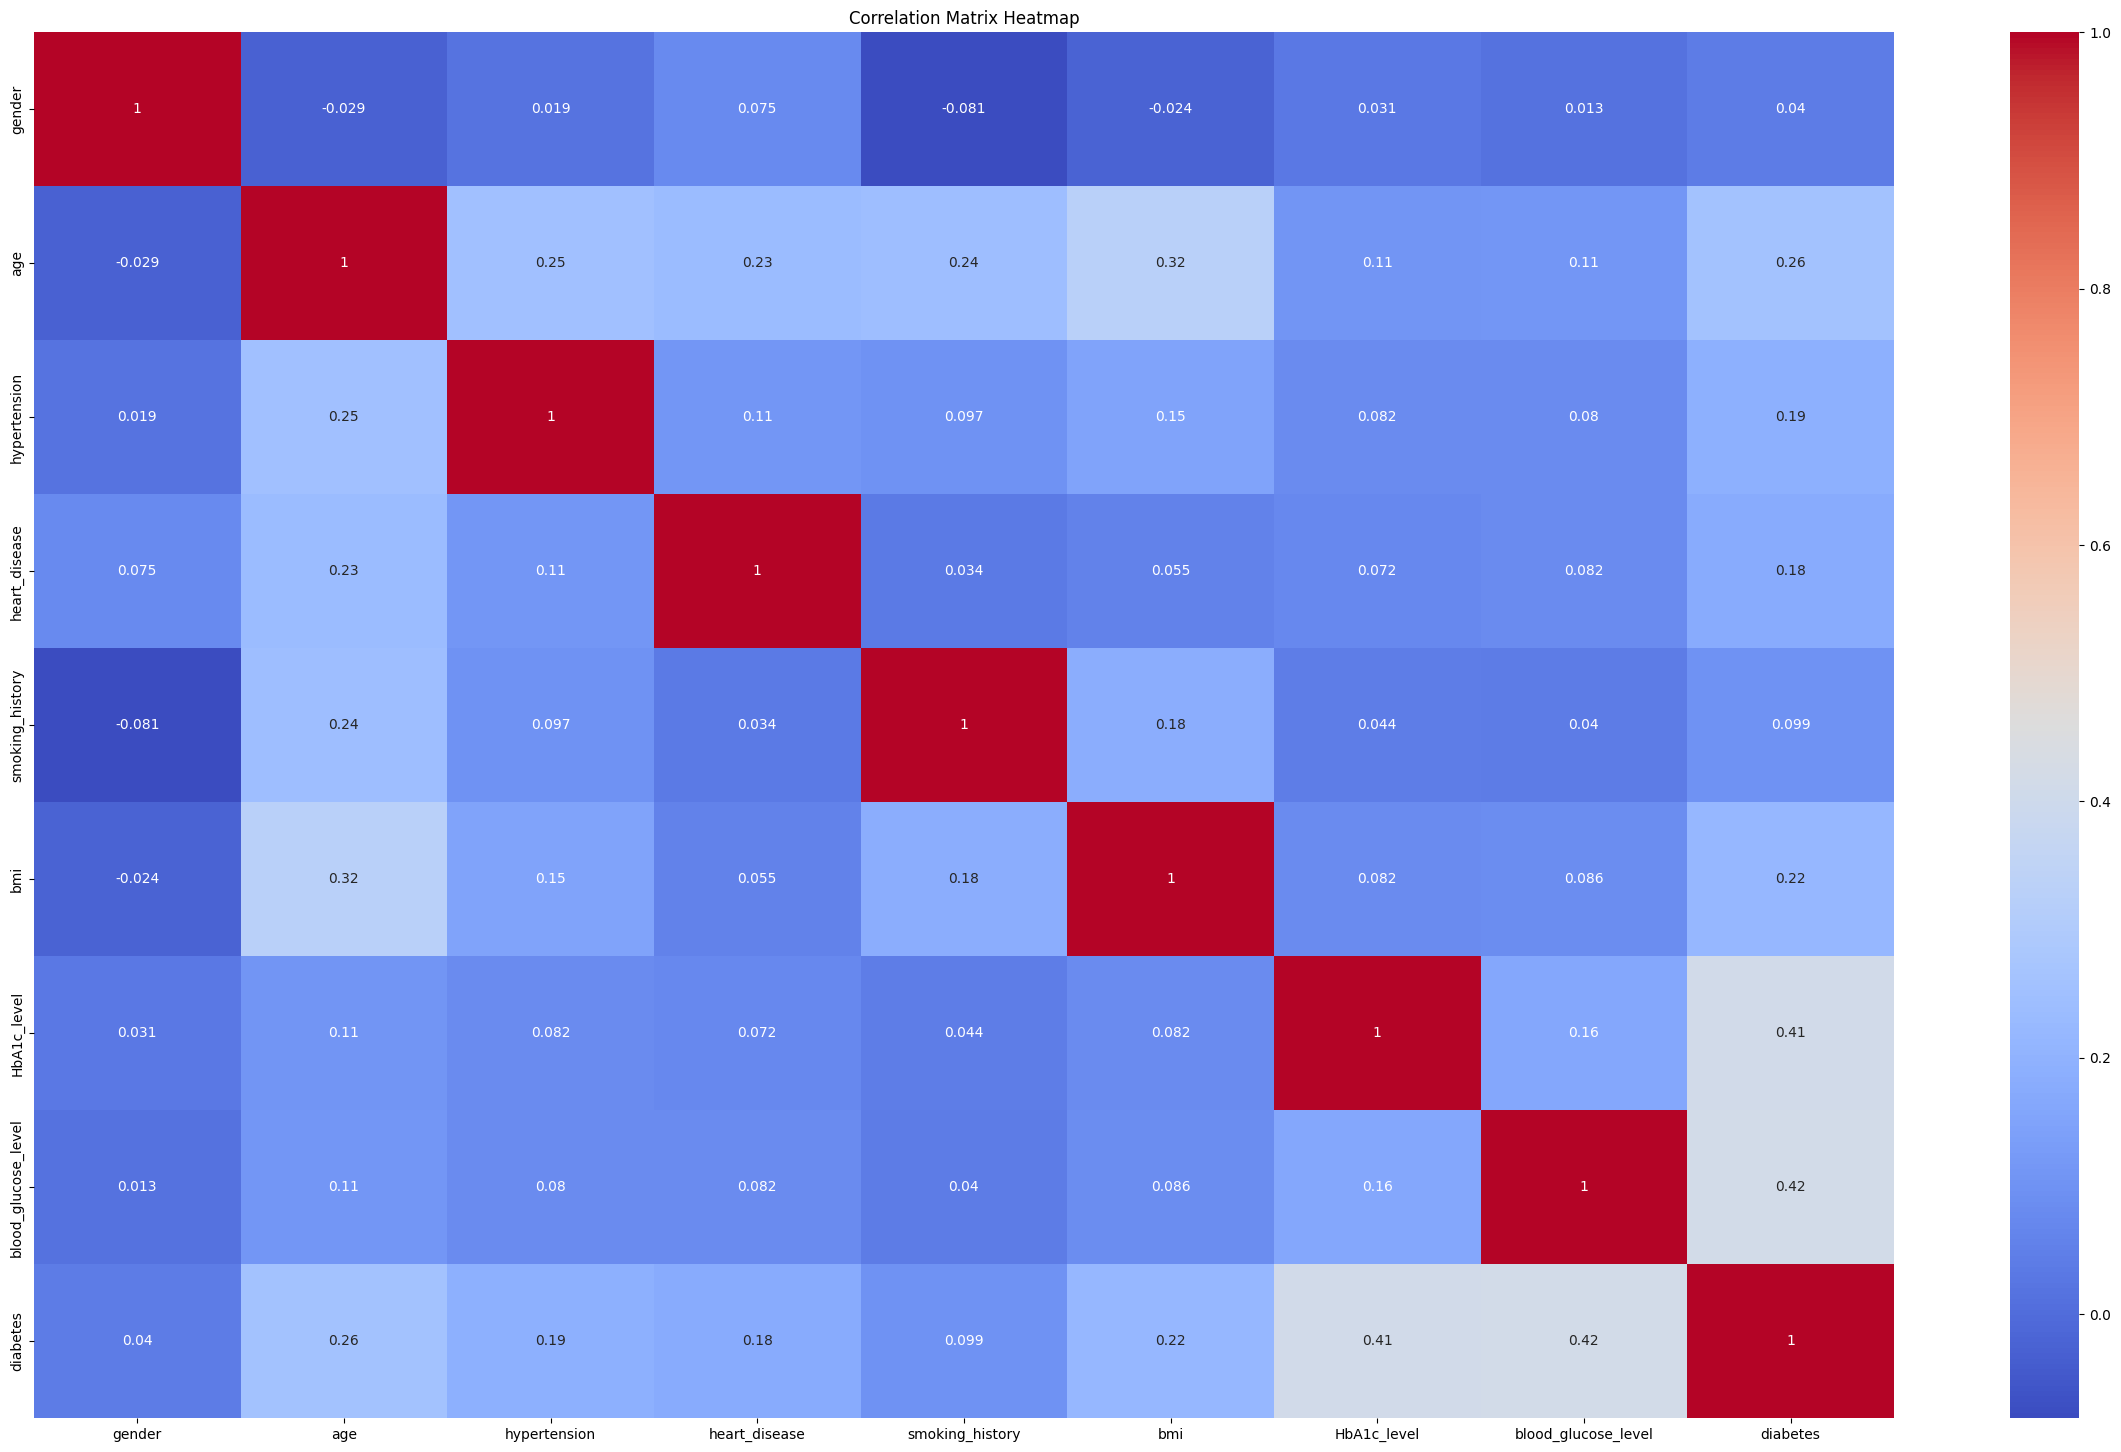

In [16]:
plt.figure(figsize=(30, 18))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# 8. Feature and Target Separation

Separates the dataset into features (X) and the target variable (y). X contains all columns except 'diabetes', and y contains the 'diabetes' column, which is the variable we want to predict.

In [17]:
X=df.drop('diabetes',axis=1)
y=df['diabetes']

# 9. Handling Class Imbalance

Imports the SMOTE class from the imblearn.over_sampling module, which is used for oversampling the minority class in an imbalanced dataset. It creates synthetic samples to balance the class distribution. This step is performed because, according to the Counter, the data contains significantly more examples of one class compared to the other.

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# 10. Model Training and Evaluation

This section imports necessary libraries for model selection, training, and evaluation. It splits the data into training and testing sets using train_test_split. Then, it initializes and trains four different classification models (Logistic Regression, Random Forest, Decision Tree, and SVC) and evaluates their performance using accuracy score.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [23]:
# Initialize and train the logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")

Accuracy of the Logistic Regression model: 0.897985989492119


In [24]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy}")

Accuracy of the Random Forest model: 0.9740586690017513


In [25]:
# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy}")

Accuracy of the Decision Tree model: 0.9661777583187391


In [26]:
# Initialize and train the SVC model
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVC model: {accuracy}")

Accuracy of the SVC model: 0.8801444833625219


In [27]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVC": SVC(random_state=42)
}

In [28]:
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print("-" * 30)


Training Logistic Regression...
Logistic Regression - Accuracy: 0.8980, Precision: 0.9046, Recall: 0.8895, F1 Score: 0.8970
------------------------------
Training Random Forest...
Random Forest - Accuracy: 0.9741, Precision: 0.9745, Recall: 0.9735, F1 Score: 0.9740
------------------------------
Training Decision Tree...
Decision Tree - Accuracy: 0.9662, Precision: 0.9656, Recall: 0.9667, F1 Score: 0.9661
------------------------------
Training SVC...
SVC - Accuracy: 0.8801, Precision: 0.8587, Recall: 0.9097, F1 Score: 0.8834
------------------------------


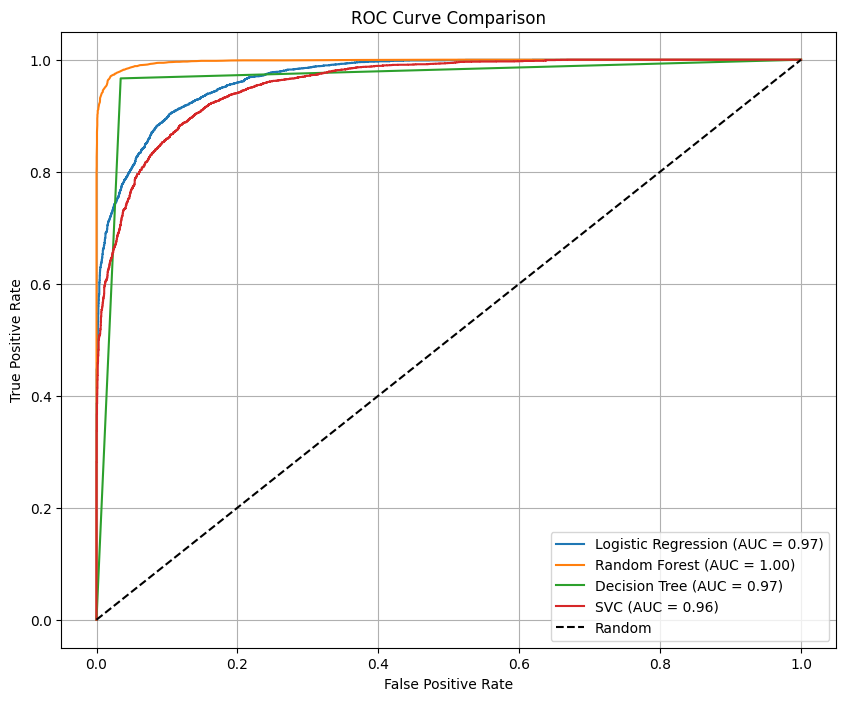

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Get probability scores (needed for ROC curve)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"): # For models like SVC
        y_proba = model.decision_function(X_test)
    else:
        # Skip models that don't provide probabilities or decision functions
        print(f"Skipping ROC curve for {name} (no predict_proba or decision_function)")
        continue

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random') # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# 11. Saving the Model

: Imports the pickle library and saves the trained Random Forest model to a file named 'randomforestmodel_diabetes.pkl'. This allows you to load and reuse the model later without retraining.

In [30]:
import pickle

# Save the Random Forest model
filename = 'randomforestmodel_diabetes.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

print(f"Random Forest model saved as {filename}")


Random Forest model saved as randomforestmodel_diabetes.pkl
